## Hour 4 – Exploring the world of Deep Learning

In [2]:
#! pip install opencv-python
# LinK : https://pypi.org/project/opencv-python/
import cv2
print('opencv:',cv2.__version__)

#! pip install numpy 
#! pip install matplotlib
#! pip install pandas

import numpy as np
print('numpy:',np.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib:',matplotlib.__version__)

import pandas as pd
print('pandas:',pd.__version__)

import warnings
warnings.filterwarnings('ignore')

import keras
print('keras:',keras.__version__)

import tensorflow as tf
print('tensorflow:',tf.__version__)

opencv: 4.2.0
numpy: 1.18.4
matplotlib: 2.2.2
pandas: 0.23.4
keras: 2.2.4
tensorflow: 1.13.1


Topics to be discussed

1.	Introduction to CNNs
2.	Multi-Class Classification using Images
3.	One shot learning for face detection
4.	Advanced computer vision deep learning concepts – Neural Style Transfer and GANs


### Introduction to CNNs

We will take a quick tour of Computer Vision using Deep Learning. So, in this section, before we can jump on the actual hands-on session, we would go through some theory first to get a better understanding of what we are going to implement.

Please take some time to go through the slides: **Computer Vision using Deep Learning** provided under the resource folder.

Main concepts to understand: 

1. Convolutional Neural Networks (CNN or ConvNets)
2. Popular ConvNet Architectures
3. Data Augmentation
4. Transfer Learning
5. Object Detection
6. Neural Style Transfer
7. Generative Adversarial Networks (GANs)
8. Variational Auto Encoders (VAEs)


### Multi-Class Image Classification using CNNs

In this section we will try to solve the problem of classification of Movie Genre from Movie Poster Images.

**Acknowledgements :**

The IMDB Id for movies were obtained from MovieLens. The IMDB Link, Title, IMDB Score, Genre and link to download movie posters were obtained from IMDB website. [*]

[*][Ref: https://www.kaggle.com/neha1703/movie-genre-from-its-poster]

**Context :**

For movie viewers, the movie posters are one of the first impressions which humans use to get cues about the movie content and its genre. Humans can grasp the cues like color, expressions on the faces of actors etc to quickly determine the genre (horror, comedy, animation etc). It has been shown that color characteristics of an image like hues, saturation, brightness, contour etc. affect human emotions. A given situation arouses these emotions in humans. If humans are able to predict genre of a movie by a single glance at its poster, then we can assume that the color characteristics, local texture based features and structural cues of posters possess some characteristics which could be utilized in machine learning algorithms to predict its genre. [*]

**Content :**

The movie posters are obtained from IMDB website. The collected dataset contains IMDB Id, IMDB Link, Title, IMDB Score, Genre and link to download movie posters. Each Movie poster can belong to at least one genre and can have at most 3 genre labels assigned to it. As the dataset also includes the IMDB score, it would be really interesting to see if movie poster is related to rating. [*]

**Inspiration :**

Does color plays an important role in deciding the genre of the movie? Can raw image pixels contain enough information to predict genre from movie? Does number of faces in the poster say anything about the movie genre? What is the most frequent color used in horror movies? Which features are important to predict animated movie genre? If a movie belong to more than one genre, can we predict them all? Can we use movie posters only to predict movie rating [*]

#### Getting started

Importing the modules. We will be using Keras as the high-level layer and tenforflow as the backend for performing this computer vision classification problem. For more information on Keras please visit: [https://keras.io/] and for more information on Tensorflow please visit [https://www.tensorflow.org/]

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Please note:**

For the actual problem, the data collection and ETL is a major step. Considering the time constraint, and for simplicity of this session, this session will focus on a small subset of the total data-set. As an extension to this session, it is recommended to explore the actual Kaggle challenge on the entire dataset.

For the purpose of the session, the extraction process is skipped and the dataset required for the scope of this workshop is already provided.

**Exploratory Data Analysis (EDA):**

Getting to know about your dataset even before deep diving into the algorithm. EDA process typically includes doing an initial analysis on the data, which generally includes and not restricted to the following:

1. Size and nature of the dataset
2. Distribution of the dataset
3. Statistical operations on the dataset (as and when applicable)

**Taking a glance at the data**

**Note :** For the purpose of making this session more interactive, some of these sections are designed to have some gaps and scopes of improvements. Incase if you find some of these areas of improvements, please feel free to discuss!

**Pop Quiz : Why do you think EDA is required?**

In [6]:
path = ''
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('The processed_data.csv consists of one-hot encoded data-frame which includes information about the data-set provided.')
data = pd.read_csv(path + 'processed_data.csv')    # reading the csv file
data.head()

The processed_data.csv consists of one-hot encoded data-frame which includes information about the data-set provided.


,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


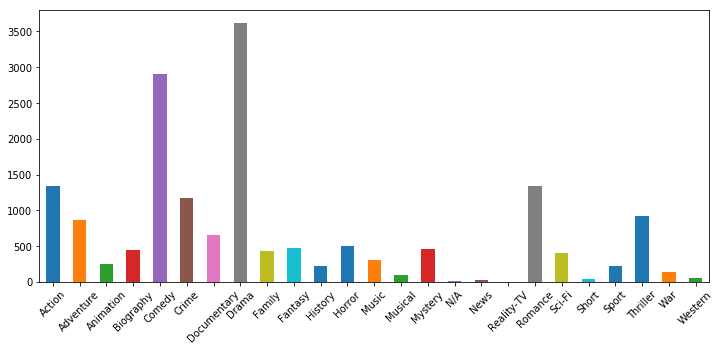

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
data.iloc[:,2:].apply(pd.Series.value_counts).transpose()[1].plot.bar(rot=45)

What problem do you think can happen from this dataset having such a distribution?

In [16]:
print('What are the different movie genres included in the dataset?')
data.columns

What are the different movie genres included in the dataset?


Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

**Data preparation:**

Before even feeding the data into the model, often the input data has to be pre-processed or prepared so that the model can ingest easily.

Loading the image data in machine readable form

100%|██████████████████████████████████████████████████████████████████████████████| 7254/7254 [01:37<00:00, 74.35it/s]


2. Convert the transformed data into numpy arrays for an efficient model operations
3. Inspect the dimension of the training data
(7254, 250, 250, 3)
4. Taking a glance at the data


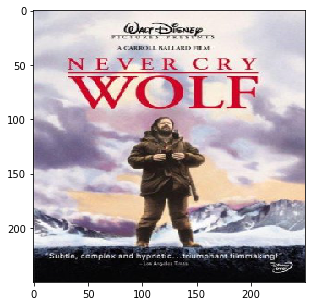

In [18]:
train_image = []
for i in tqdm(range(data.shape[0])):
    img = image.load_img(path + 'image_data/'+ data['Id'][i] +'.jpg',target_size=(250,250,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    

print('2. Convert the transformed data into numpy arrays for an efficient model operations')
train_data = np.array(train_image)
print('3. Inspect the dimension of the training data')
print(train_data.shape)
print('4. Taking a glance at the data')
rcParams['figure.figsize'] = 5, 5
plt.imshow(train_data[20])
plt.show()

In [19]:
print('What can be the Genre of this movie?')
data['Genre'][20]

What can be the Genre of this movie?


"['Adventure', 'Drama']"